In [3]:
from sklearn import datasets
dataset = datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/youngbin/scikit_learn_data


In [4]:
dataset

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

In [5]:
dataset['data'].shape

(400, 4096)

In [6]:
dataset['images'].shape

(400, 64, 64)

In [7]:
dataset['target'].shape

(400,)

In [9]:
import matplotlib.pyplot as plt

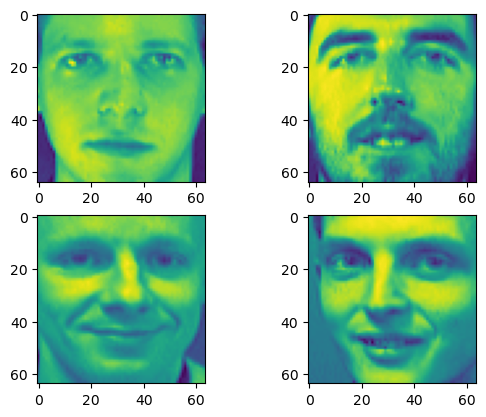

In [18]:
plt.subplot(2, 2, 1)
plt.imshow(dataset['images'][0])
plt.subplot(2, 2, 2)
plt.imshow(dataset['images'][100])
plt.subplot(2, 2, 3)
plt.imshow(dataset['images'][200])
plt.subplot(2, 2, 4)
plt.imshow(dataset['images'][399])

In [22]:
import pandas as pd

In [29]:
pd.DataFrame(dataset['target']).value_counts().sort_index()

0     10
1     10
2     10
3     10
4     10
5     10
6     10
7     10
8     10
9     10
10    10
11    10
12    10
13    10
14    10
15    10
16    10
17    10
18    10
19    10
20    10
21    10
22    10
23    10
24    10
25    10
26    10
27    10
28    10
29    10
30    10
31    10
32    10
33    10
34    10
35    10
36    10
37    10
38    10
39    10
Name: count, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = dataset['data']

In [32]:
y = dataset['target']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, stratify=y)

In [41]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((360, 4096), (40, 4096), (360,), (40,))

In [43]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=40, stratify=y_train)

In [44]:
X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape

((320, 4096), (40, 4096), (40, 4096), (320,), (40,), (40,))

In [48]:
from sklearn.cluster import KMeans
import numpy as np

In [52]:
max_k = 100
inertias = np.empty((max_k))
for k in range(1, max_k + 1):
    kmeans_ = KMeans(n_clusters=k, n_init=10, random_state=42)
    inertias[k-1] = kmeans_.fit(X_train).inertia_


In [53]:
inertias

array([25221.3046875 , 21414.9296875 , 19253.08789062, 18067.99023438,
       17220.7578125 , 16668.20703125, 16276.59765625, 15875.66601562,
       15532.35546875, 15120.5625    , 14816.68164062, 14522.62109375,
       14322.19433594, 14084.01757812, 13807.46289062, 13585.62109375,
       13238.98632812, 13141.53515625, 12866.70214844, 12639.8828125 ,
       12522.70703125, 12331.13867188, 12101.07421875, 11844.08007812,
       11625.90820312, 11518.94824219, 11343.72851562, 11152.00195312,
       11085.17382812, 10746.86914062, 10751.37011719, 10625.96484375,
       10418.23730469, 10419.5546875 , 10211.07617188, 10115.45507812,
        9972.80859375,  9917.84179688,  9614.3984375 ,  9557.78417969,
        9442.56835938,  9408.27148438,  9179.04101562,  9061.04003906,
        9041.37304688,  8935.4453125 ,  8828.56445312,  8754.60839844,
        8715.140625  ,  8474.12695312,  8410.9375    ,  8346.80371094,
        8262.62597656,  8070.7578125 ,  7925.21777344,  7874.62304688,
      

In [56]:
from sklearn.metrics import silhouette_score

In [82]:
max_k = 150
models = []
for k in range(5, 150, 5):
    kmeans_ = KMeans(n_clusters=k, n_init=10, random_state=42)
    model = kmeans_.fit(X_train)
    models.append(model)

In [83]:
inertias = [model.inertia_ for model in models]

In [85]:
scores = [silhouette_score(X_train, model.labels_) for model in models]

In [103]:
best_k = (np.argmax(scores) + 1) * 5

In [104]:
best_score = np.max(scores)

In [105]:
best_k

130

In [102]:
best_score

0.19921756

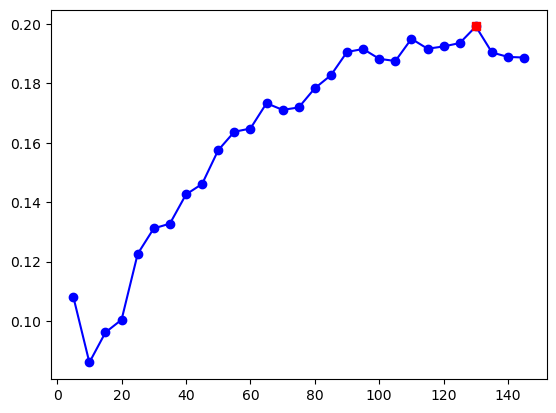

In [107]:
plt.plot(range(5, 150, 5) , scores, "bo-")
plt.plot(best_k, best_score, "rs")

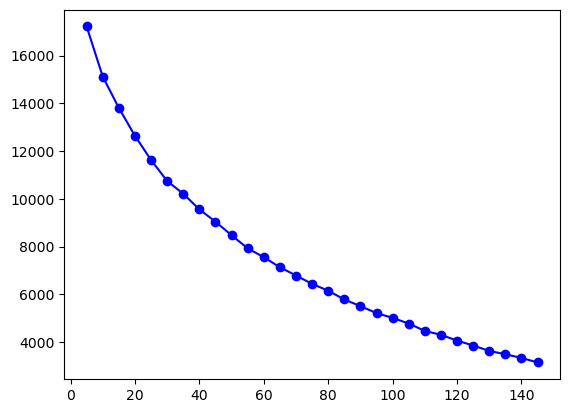

In [91]:

plt.plot(range(5, 150, 5) , inertias, "bo-")

In [109]:
best_model = models[25]

Cluster 0


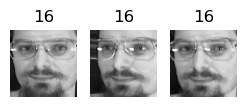

Cluster 1


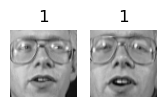

Cluster 2


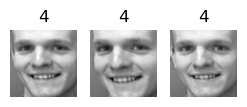

Cluster 3


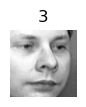

Cluster 4


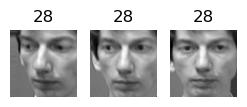

Cluster 5


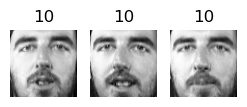

Cluster 6


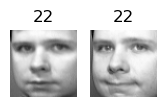

Cluster 7


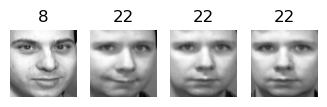

Cluster 8


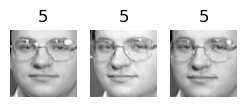

Cluster 9


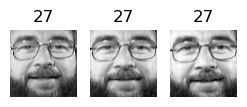

Cluster 10


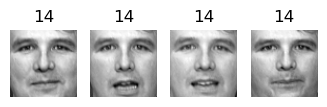

Cluster 11


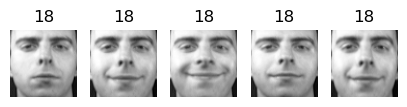

Cluster 12


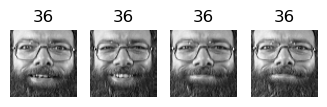

Cluster 13


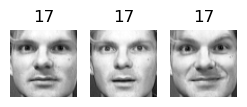

Cluster 14


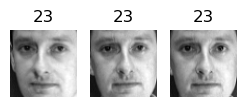

Cluster 15


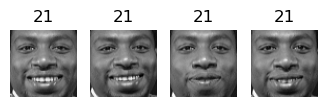

Cluster 16


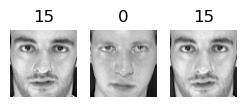

Cluster 17


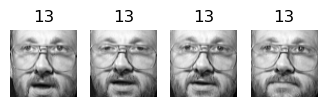

Cluster 18


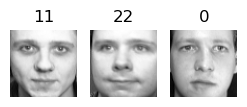

Cluster 19


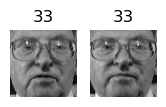

Cluster 20


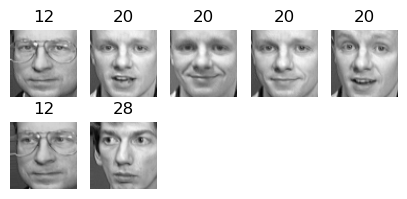

Cluster 21


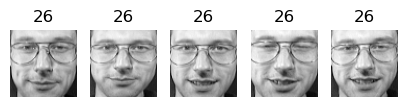

Cluster 22


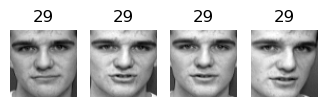

Cluster 23


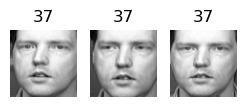

Cluster 24


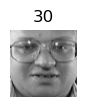

Cluster 25


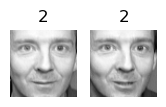

Cluster 26


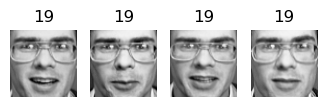

Cluster 27


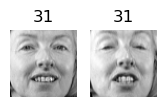

Cluster 28


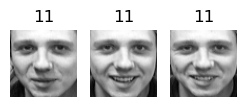

Cluster 29


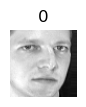

Cluster 30


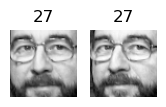

Cluster 31


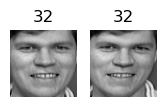

Cluster 32


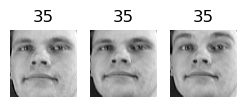

Cluster 33


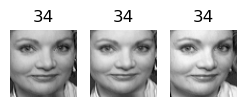

Cluster 34


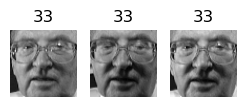

Cluster 35


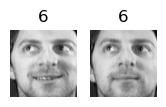

Cluster 36


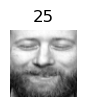

Cluster 37


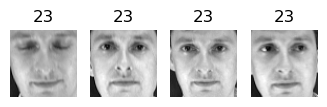

Cluster 38


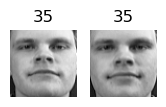

Cluster 39


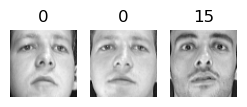

Cluster 40


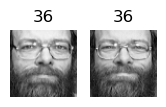

Cluster 41


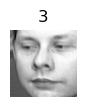

Cluster 42


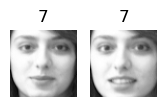

Cluster 43


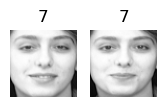

Cluster 44


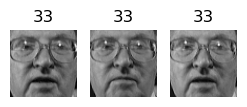

Cluster 45


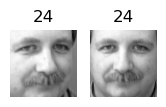

Cluster 46


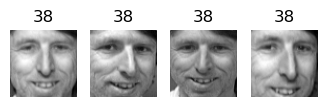

Cluster 47


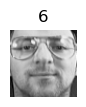

Cluster 48


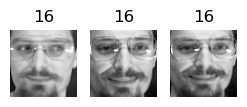

Cluster 49


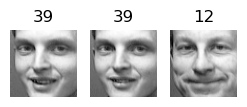

Cluster 50


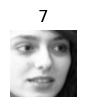

Cluster 51


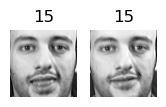

Cluster 52


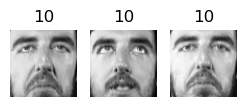

Cluster 53


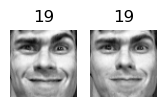

Cluster 54


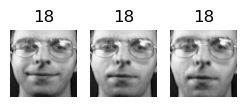

Cluster 55


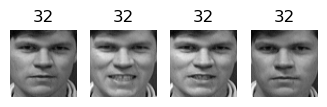

Cluster 56


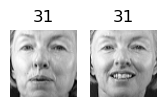

Cluster 57


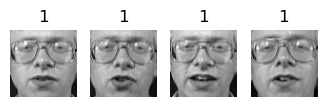

Cluster 58


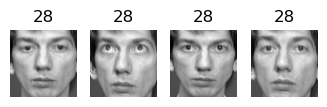

Cluster 59


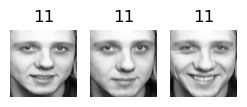

Cluster 60


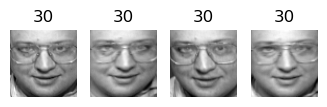

Cluster 61


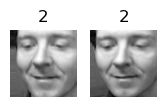

Cluster 62


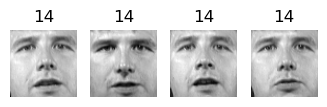

Cluster 63


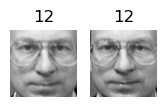

Cluster 64


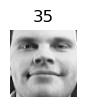

Cluster 65


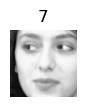

Cluster 66


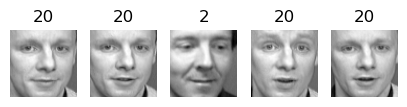

Cluster 67


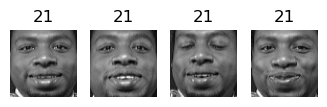

Cluster 68


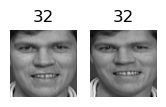

Cluster 69


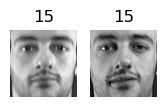

Cluster 70


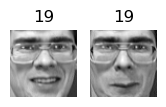

Cluster 71


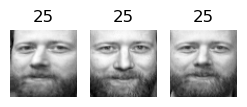

Cluster 72


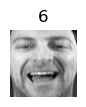

Cluster 73


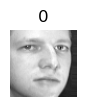

Cluster 74


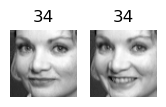

Cluster 75


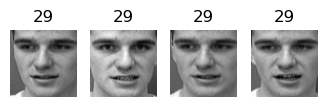

Cluster 76


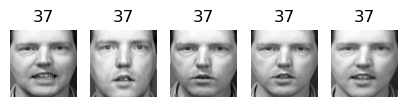

Cluster 77


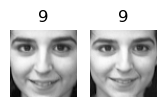

Cluster 78


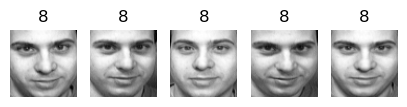

Cluster 79


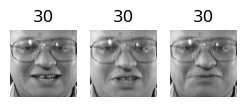

Cluster 80


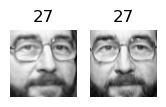

Cluster 81


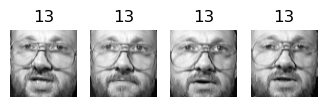

Cluster 82


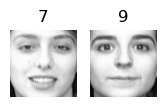

Cluster 83


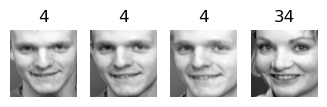

Cluster 84


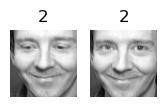

Cluster 85


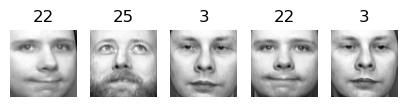

Cluster 86


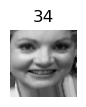

Cluster 87


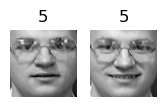

Cluster 88


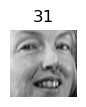

Cluster 89


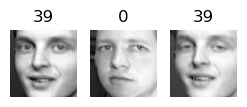

Cluster 90


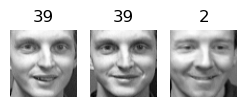

Cluster 91


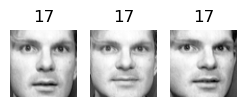

Cluster 92


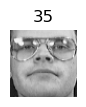

Cluster 93


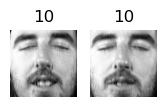

Cluster 94


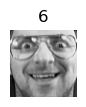

Cluster 95


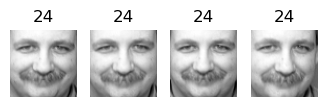

Cluster 96


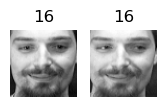

Cluster 97


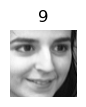

Cluster 98


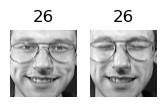

Cluster 99


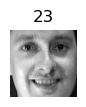

Cluster 100


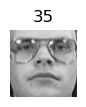

Cluster 101


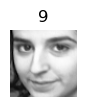

Cluster 102


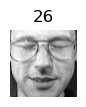

Cluster 103


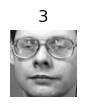

Cluster 104


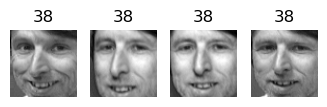

Cluster 105


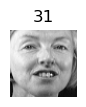

Cluster 106


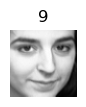

Cluster 107


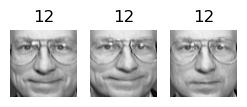

Cluster 108


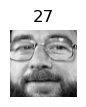

Cluster 109


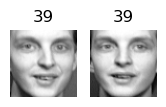

Cluster 110


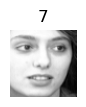

Cluster 111


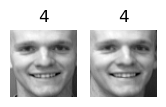

Cluster 112


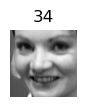

Cluster 113


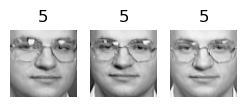

Cluster 114


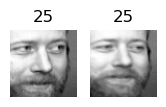

Cluster 115


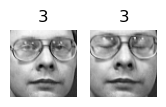

Cluster 116


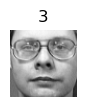

Cluster 117


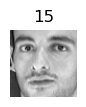

Cluster 118


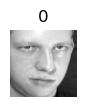

Cluster 119


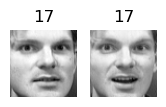

Cluster 120


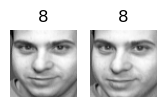

Cluster 121


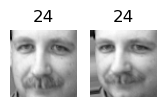

Cluster 122


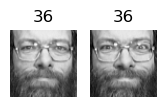

Cluster 123


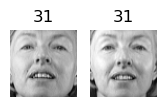

Cluster 124


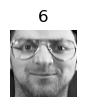

Cluster 125


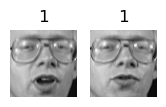

Cluster 126


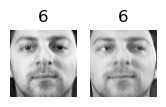

Cluster 127


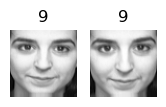

Cluster 128


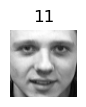

Cluster 129


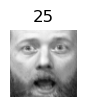

In [111]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index+1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_ == cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

In [112]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train, y_train)
clf.score(X_valid, y_valid)

0.95

In [113]:
X_train_reduced = best_model.transform(X_train)

In [114]:
X_train_reduced.shape

(320, 130)

In [119]:
clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_reduced, y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [120]:
X_valid_reduced = best_model.transform(X_valid)

In [121]:
clf.score(X_valid_reduced, y_valid)

0.925

In [122]:
X_valid_reduced.shape

(40, 130)

In [125]:
from sklearn.pipeline import make_pipeline

k_range = range(5, 150, 5)
for n_clusters in k_range:
    pipeline = make_pipeline(
        KMeans(n_clusters=n_clusters, n_init=10, random_state=42),
        RandomForestClassifier(n_estimators=150, random_state=42)
    )
    pipeline.fit(X_train, y_train)
    print(n_clusters, pipeline.score(X_valid, y_valid))

5 0.725
10 0.8
15 0.9
20 0.875
25 0.875
30 0.8
35 0.85
40 0.9
45 0.85
50 0.875
55 0.875
60 0.925
65 0.875
70 0.9
75 0.9
80 0.85
85 0.925
90 0.925
95 0.875
100 0.925
105 0.925
110 0.875
115 0.9
120 0.9
125 0.9
130 0.925
135 0.875
140 0.875
145 0.925


In [127]:
X_train_aug = np.c_[X_train_reduced, X_train]
X_valid_aug = np.c_[X_valid_reduced, X_valid]

In [128]:
clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_aug, y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [129]:
clf.score(X_valid_aug, y_valid)

0.95

In [130]:
from sklearn.mixture import GaussianMixture

In [131]:
from sklearn.decomposition import PCA

In [132]:
pca = PCA(n_components=0.99)

In [133]:
X_train_pca = pca.fit_transform(X_train)

In [134]:
gm = GaussianMixture(n_components=40, random_state=42)

In [135]:
y_pred = gm.fit_predict(X_train_pca)

In [138]:
samples = gm.sample(5)

In [145]:
pca.inverse_transform(samples[0][0]).shape

(4096,)

In [148]:
X_train_pca.shape, X_train.shape

((320, 221), (320, 4096))

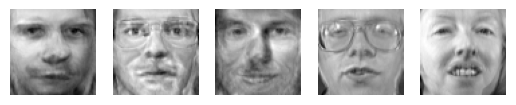

In [154]:
for index, sample in enumerate(samples[0]):
    face = pca.inverse_transform(sample).reshape((64,64))
    plt.subplot(1, 5, index+1)
    plt.imshow(face, cmap="gray")
    plt.axis("off")

In [157]:
gm.score_samples(X_train_pca[0].reshape(1, -1))

array([1252.05942523])

In [158]:
gm.score_samples(samples[0][0].reshape(1, -1))

array([1112.64762911])

In [162]:
rando = np.random.randn(221)

In [163]:
gm.score_samples(rando.reshape(1, -1))

array([-77027860.53354035])

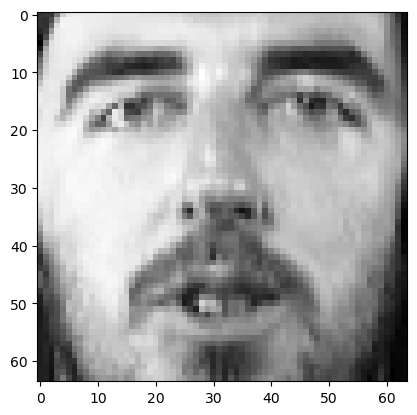

In [166]:
plt.imshow(X_train[0].reshape((64,64)), cmap="gray")

In [168]:
example_img = X_train[0]

In [170]:
example_img[100:300] = 0


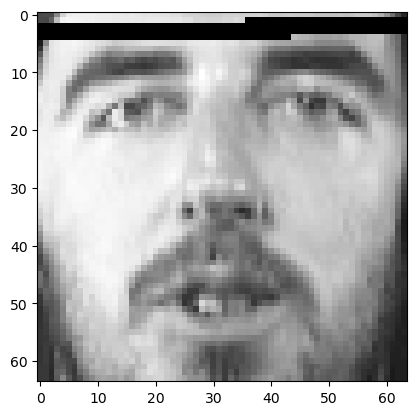

In [171]:
plt.imshow(example_img.reshape((64,64)), cmap="gray")

In [177]:
gm.score_samples(pca.transform(example_img.reshape(1, -1)).reshape(1, -1))

array([-27409432.68689462])

In [178]:
gm.score_samples(pca.transform(X_train[0].reshape(1, -1)).reshape(1, -1))

array([-27409432.68689462])

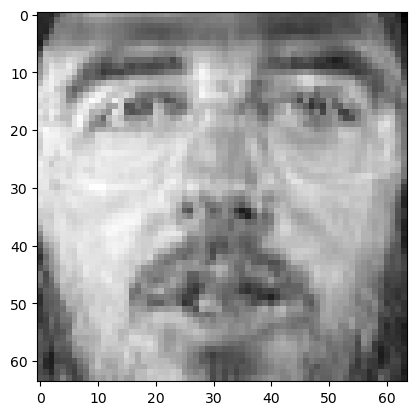

In [179]:
plt.imshow(pca.inverse_transform(pca.transform(X_train[0].reshape(1, -1))).reshape((64,64)), cmap="gray")

In [180]:
gm.score_samples(X_train_pca[0].reshape(1, -1))

array([1252.05942523])

In [226]:
pca.transform(X_train[0].reshape(1, -1)).shape, X_train_pca[0].shape

((1, 221), (221,))

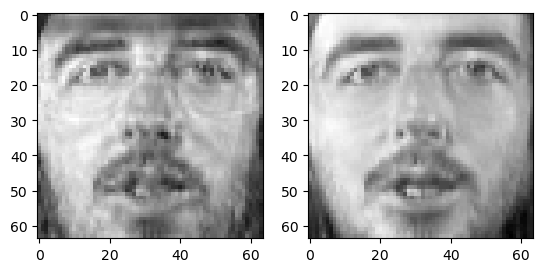

In [227]:
plt.subplot(1, 2, 1)
plt.imshow(pca.inverse_transform(pca.transform(X_train[0].reshape(1, -1))).reshape((64,64)), cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(pca.inverse_transform(X_train_pca[0].reshape(1, -1)).reshape((64,64)), cmap="gray")



In [209]:
cloned_reduced_img_vector = X_train_pca[1].copy()

In [214]:
cloned_reduced_img_vector[5:6] = 0

In [215]:
gm.score_samples(cloned_reduced_img_vector.reshape(1, -1))

array([-502365.16480945])

In [216]:
gm.score_samples(X_train_pca[1].reshape(1, -1))

array([1252.05942424])

In [217]:
gm.score_samples(X_train_pca[1].reshape(1, -1))

array([1252.05942424])

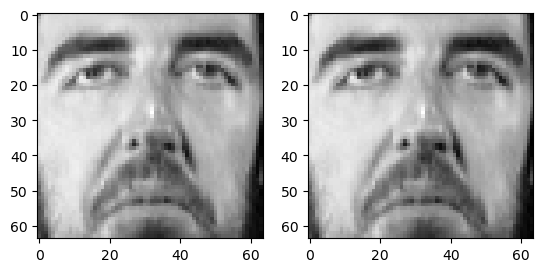

In [218]:
plt.subplot(1, 2, 1)
plt.imshow(pca.inverse_transform(cloned_reduced_img_vector).reshape((64,64)), cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(pca.inverse_transform(X_train_pca[1]).reshape((64,64)), cmap="gray")



In [219]:
cloned_reduced_img_vector2 = X_train_pca[1].copy()
cloned_reduced_img_vector2[0:1] = 0

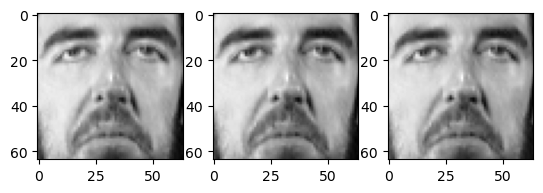

In [220]:
plt.subplot(1, 3, 1)
plt.imshow(pca.inverse_transform(cloned_reduced_img_vector).reshape((64,64)), cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(pca.inverse_transform(X_train_pca[1]).reshape((64,64)), cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(pca.inverse_transform(cloned_reduced_img_vector2).reshape((64,64)), cmap="gray")



In [221]:
gm.score_samples(cloned_reduced_img_vector2.reshape(1, -1))

array([-2655922.19679861])

In [222]:
gm.score_samples(X_train_pca[:10])

array([-5.65496901e+06,  1.25205942e+03,  1.27261994e+03,  1.29523275e+03,
        1.29532738e+03,  1.16779294e+03,  1.27950424e+03,  1.25751521e+03,
        1.28775118e+03,  1.26576499e+03])